# Team Members Visualization
This notebook's aim is to use the Lichess API to see the distribution of members. Hopefully that will offer insight into figuring out the best way to optimize the arenas.

## Imports

In [1]:
import pandas as pd
import requests
import json

## Constants

In [2]:
TEAM_ID = 'chess960'
ENDPOINT = f'https://lichess.org/api/team/{TEAM_ID}/users'

## Download into dataframe

Hit the endpoint

In [3]:
r = requests.get(ENDPOINT)

Deparse from Lichess

In [4]:
assert r.status_code == 200

strings = r.text.split('\n')
members = []
profiles = []
scores = []
for s in strings:
    try:
        member = json.loads(s)
    except:
        continue 

    if 'chess960' in member['perfs'] and 'seenAt' in member:
        score = member['perfs']['chess960'].copy()
        score['seenAt'] = member['seenAt']
        scores.append(score)
    if 'profile' in member:
        profiles.append(member['profile'])
        
    members.append(member)
print(f'Members: {len(members)} Profiles: {len(profiles)} ELOs: {len(scores)}')

Members: 1050 Profiles: 663 ELOs: 751


Convert to dataframe

In [5]:
members = pd.DataFrame(members)
members.to_csv('data/members.csv', index=False)
members

,id,username,online,perfs,createdAt,profile,seenAt,playTime,language,url,booster,title,patron,tosViolation,disabled
0,zalioth,Zalioth,False,"{'chess960': {'games': 11, 'rating': 1588, 'rd...",1609889612232,"{'country': 'ES', 'location': 'AlcalÃ¡ la Real...",1.615414e+12,"{'total': 55072, 'tv': 0}",es-ES,https://lichess.org/@/Zalioth,NaN,NaN,NaN,NaN,NaN
1,eugenious45,EuGenious45,False,"{'blitz': {'games': 353, 'rating': 1486, 'rd':...",1611159371260,{'country': 'MX'},1.615316e+12,"{'total': 211473, 'tv': 0}",es-ES,https://lichess.org/@/EuGenious45,NaN,NaN,NaN,NaN,NaN
2,jordantrodney,JordanTRodney,False,"{'blitz': {'games': 134, 'rating': 1207, 'rd':...",1599921975087,{'firstName': 'FsuJordan'},1.615396e+12,"{'total': 55870, 'tv': 0}",en-US,https://lichess.org/@/JordanTRodney,True,NaN,NaN,NaN,NaN
3,flakerocks,flakerocks,True,"{'blitz': {'games': 5228, 'rating': 1594, 'rd'...",1599677859998,NaN,1.615475e+12,"{'total': 1589950, 'tv': 0}",en-US,https://lichess.org/@/flakerocks,NaN,NaN,NaN,NaN,NaN
4,yomeromero,YOMEROMERO,False,"{'blitz': {'games': 76, 'rating': 1849, 'rd': ...",1614833939624,NaN,1.615445e+12,"{'total': 50957, 'tv': 0}",es-ES,https://lichess.org/@/YOMEROMERO,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,chessbaz,Chessbaz,False,"{'blitz': {'games': 8, 'rating': 1616, 'rd': 2...",1356161632411,NaN,1.462984e+12,"{'total': 29549, 'tv': 0}",en,https://lichess.org/@/Chessbaz,NaN,NaN,NaN,NaN,NaN
1046,apsu2323,apsu2323,False,"{'chess960': {'games': 381, 'rating': 1857, 'r...",1310848148000,{'bio': 'I liek cheese :D'},NaN,"{'total': 1010987, 'tv': 0}",NaN,https://lichess.org/@/apsu2323,NaN,NaN,NaN,NaN,NaN
1047,jacob135135,Jacob135135,False,"{'chess960': {'games': 2672, 'rating': 1909, '...",1299966594000,"{'country': 'SK', 'firstName': 'Jakub', 'lastN...",1.615469e+12,"{'total': 3092689, 'tv': 120381}",en-US,https://lichess.org/@/Jacob135135,NaN,NaN,NaN,NaN,NaN
1048,yue,yue,False,"{'chess960': {'games': 788, 'rating': 1388, 'r...",1347382322859,{'country': 'DE'},1.615450e+12,"{'total': 1060212, 'tv': 1124}",en-US,https://lichess.org/@/yue,NaN,NaN,NaN,NaN,NaN


In [6]:
profiles = pd.DataFrame(profiles)
profiles.to_csv('data/profiles.csv', index=False)
profiles

,country,location,firstName,lastName,bio,fideRating,uscfRating,ecfRating,links
0,ES,AlcalÃ¡ la Real,JosÃ© Ignacio,Carmona Villegas,NaN,NaN,NaN,NaN,NaN
1,MX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,FsuJordan,NaN,NaN,NaN,NaN,NaN,NaN
3,LK,kagella,p.a.l.,udakara,i am in pinnawala school,600.0,NaN,NaN,NaN
4,CZ,Liberec,SxCapture,1.0,"Plays random moves, prefer captures. Supports ...",700.0,200.0,20.0,https://sx.rosada.cz/projects/sxcapture
...,...,...,...,...,...,...,...,...,...
658,BR,"Jales, SÃ£o Paulo",Thiago,Evangelista,Playing since april 2011. \r\nLeader of Brazil...,NaN,NaN,NaN,NaN
659,NaN,NaN,NaN,NaN,I liek cheese :D,NaN,NaN,NaN,NaN
660,SK,NaN,Jakub,B.,NaN,NaN,NaN,148.0,NaN
661,DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
scores = pd.DataFrame(scores)
scores.to_csv('data/scores.csv', index=False)
scores['seenAt'] = pd.to_datetime(scores['seenAt'], unit='ms', origin='unix')
scores

,games,rating,rd,prog,prov,seenAt
0,11,1588,160,0,True,2021-03-10 21:59:22.171
1,1,1419,383,0,True,2021-03-11 14:56:21.907
2,4,982,184,0,True,2021-03-11 15:17:05.184
3,31,1328,78,-8,NaN,2021-03-11 15:17:27.951
4,4370,1952,45,6,NaN,2021-03-11 15:19:31.947
...,...,...,...,...,...,...
746,82,1179,258,0,True,2014-01-15 05:14:10.053
747,602,1812,135,22,True,2021-03-11 14:46:49.905
748,2672,1909,102,-21,NaN,2021-03-11 13:28:45.673
749,788,1388,91,-35,NaN,2021-03-11 08:11:03.838


## Exploratory Analysis

<AxesSubplot:>

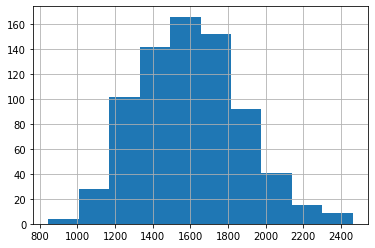

In [8]:
scores['rating'].hist()